## Esempio di analisi dati per prima esperienza di Laboratorio
### Il metodo voltamperometrico

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_monte = pd.read_excel('dati/conf_monte.xlsx', skiprows=1)
data_valle = pd.read_excel('dati/conf_valle.xlsx')

Quelli riportati sono errori massimi.

Come visto a lezione, possiamo considerare come errore statistico da attribuire alle misure da usare nel fit nel seguente modo:

In [3]:
I_m = data_monte['Ix']
V_m = data_monte['Vx']
I_v = data_valle['Ix']
V_v = data_valle['Vx']

Vx_err = np.ones(len(I_m))*(2/50)/2 # #la sensibilità del nostro strumento è data dal fondoscale diviso il numero di divisioni
Ix_err = np.ones(len(I_m))*(500/50)/2 # #la sensibilità del nostro strumento è data dal fondoscale diviso il numero di divisioni
sigmaI = Ix_err*2/np.sqrt(12) #sara spiegato a lezione
sigmaV = Vx_err*2/np.sqrt(12) #sara spiegato a lezione


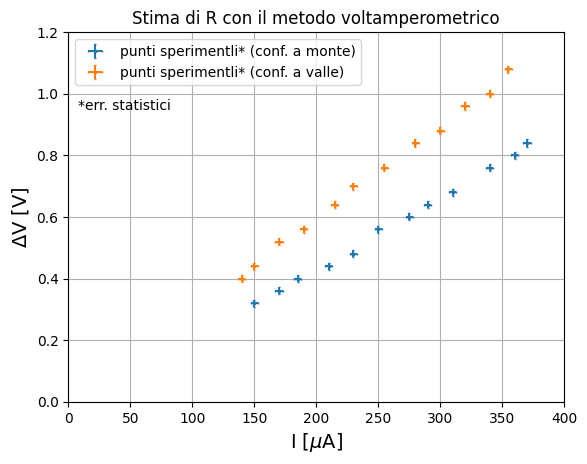

In [4]:
plt.errorbar(I_m, V_m, xerr=sigmaI, yerr=sigmaV, fmt='s', markersize=2., capsize=1, label='punti sperimentli* (conf. a monte)')
plt.errorbar(I_v, V_v, xerr=sigmaI, yerr=sigmaV, fmt='s', markersize=2., capsize=1, label='punti sperimentli* (conf. a valle)')

plt.annotate('*err. statistici',
        xy=(0.02, 0.82), xycoords='axes fraction',
        ha='left', va='top', fontsize=10)

plt.legend()
plt.ylabel('$\Delta$V [V]', size=14)
plt.xlabel('I [$\mu$A]', size=14)
plt.grid()
plt.title('Stima di R con il metodo voltamperometrico')
plt.savefig('metodo_voltamperometrico.png', dpi=150)
plt.xlim(0, 400)
plt.ylim(0, 1.2)
plt.show()

## Minimi quadrati e fit lineare

I dati raccolti in effetti mostrano un andamento lineare. 
Come possiamo estrarre una stima dei parametri della retta che meglio descrive tale andamento?

Possiamo usare il metodo dei minimi quadrati. Per una retta (o in generale per qualsiasi funzione lineare nei parametri) è possibile ricavare analiticamente i parametri che minimizzano il chiquadro, ossia i parametri di best fit.

Implementiamo il metodo in una funzione di python!

In [5]:
def fit_lineare_pesato(x,y,w, verbose=True) :
    """
    questa funzione calcola i parametri della retta di best fit y = a + b*x 
    usando le formule dei minimi quadrati pesati.
    N.B. w è il vettore dei pesi, dove il peso w_i è l'inverso del quadrato dell'incertezza 
    sulla coordinata y_i dell'i-esimo punto.    
    """
    S_0 = np.sum(w)
    S_x = np.sum(x*w)     
    S_xx = np.sum(x*x*w)     
    S_y = np.sum(y*w)
    S_xy = np.sum(x*y*w)
    D = S_0 * S_xx - S_x**2
    a = (S_xx * S_y - S_x * S_xy) / D
    b = (S_0 * S_xy - S_x * S_y) / D
    var_a = S_xx / D
    var_b = S_0 / D
    cov_ab = -S_x / D
    sigma_a = np.sqrt(var_a)
    sigma_b = np.sqrt(var_b)
    # Compute chi^2 = \sum w_i (y_i - (a + b * x_i))^2
    chi2 = np.sum (w * (y-(a+b*x))**2)
    if verbose:
        print(f"a = {a}+/-{sigma_a}")
        print(f"b = {b}+/-{sigma_b}")
        print(f"cov(a,b) = {cov_ab}")
        print(f"chi/ndof= {chi2}/{len(x)-2} = {chi2/(len(x)-2)}")

    return a,b,sigma_a,sigma_b,cov_ab,chi2

All'occorrenza possiamo definire nuove funzioni nel notebook stesso, ppure possiamo salvare la definizione in un file .py, ad esempio mymodule.py, ed importarla come:
```python
from mymodule import *
```
Questo ci torna utile se vogliamo riutilizzare in piu occasioni una funzione che abbiamo definito

In [6]:
from mymodule import *

adesso possiamo chiamare la nostra funzione `fit_lineare_pesato`

In [7]:
a_m, b_m, sigma_a_m, sigma_b_m, cov_ab_m, chi2_m = fit_lineare_pesato(I_m, V_m, 1.0/sigmaV**2)

a = -0.041601085481682495+/-0.012639452781724304
b = 0.002350067842605156+/-4.659359789706324e-05
cov(a,b) = -5.680687471732247e-07
chi/ndof= 8.051560379918623/10 = 0.8051560379918623


In [8]:
#b_m è in V/\muA -> Mohm

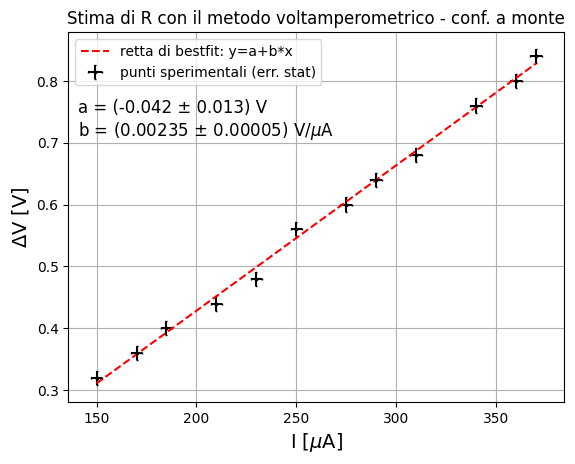

In [9]:
plt.errorbar(I_m, V_m, xerr=sigmaI, yerr=sigmaV, fmt='s', markersize=2., capsize=1, color='black', label='punti sperimentali (err. stat)')

plt.plot(I_m, a_m + b_m*I_m, color='red', ls='--', label='retta di bestfit: y=a+b*x')

str_A = f'a = ({a_m:.3f} ± {sigma_a_m:.3f}) V'
str_B = f'b = ({b_m:.5f} ± {sigma_b_m:.5f}) V/$\mu$A'

plt.annotate(str_A+'\n'+str_B,
        xy=(0.02, 0.82), xycoords='axes fraction',
        ha='left', va='top', fontsize=12)

plt.legend()
plt.ylabel('$\Delta$V [V]', size=14)
plt.xlabel('I [$\mu$A]', size=14)
plt.grid()
plt.title('Stima di R con il metodo voltamperometrico - conf. a monte')
plt.show()

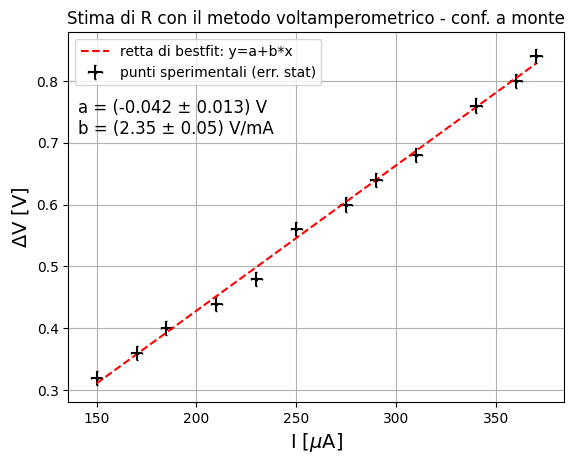

In [10]:
plt.errorbar(I_m, V_m, xerr=sigmaI, yerr=sigmaV, fmt='s', markersize=2., capsize=1, color='black', label='punti sperimentali (err. stat)')

plt.plot(I_m, a_m + b_m*I_m, color='red', ls='--', label='retta di bestfit: y=a+b*x')

str_A = f'a = ({a_m:.3f} ± {sigma_a_m:.3f}) V'
str_B = f'b = ({b_m*1000:.2f} ± {sigma_b_m*1000:.2f}) V/mA'

plt.annotate(str_A+'\n'+str_B,
        xy=(0.02, 0.82), xycoords='axes fraction',
        ha='left', va='top', fontsize=12)

plt.legend()
plt.ylabel('$\Delta$V [V]', size=14)
plt.xlabel('I [$\mu$A]', size=14)
plt.grid()
plt.title('Stima di R con il metodo voltamperometrico - conf. a monte')
plt.show()

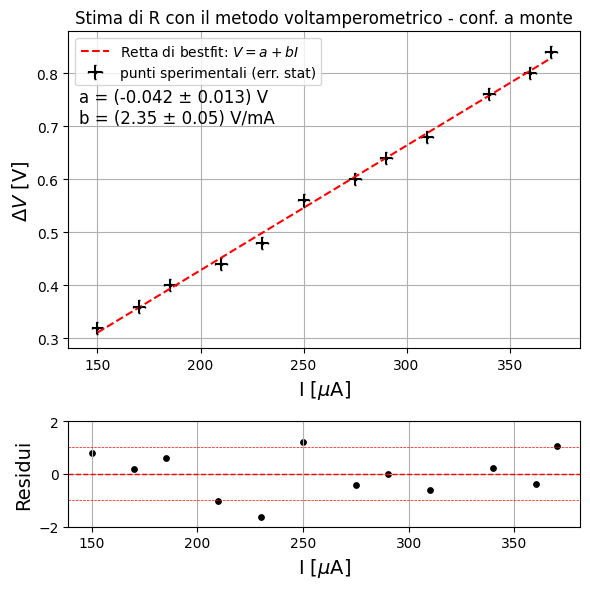

In [11]:
residui = (V_m - (a_m + b_m*I_m))/sigmaV

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 6), gridspec_kw={'height_ratios': [3, 1]})

# primo plot
ax1.errorbar(I_m, V_m, xerr=sigmaI, yerr=sigmaV, fmt='s', markersize=2., capsize=1, color='black', label='punti sperimentali (err. stat)')
ax1.plot(I_m, a_m + b_m*I_m, color='red', ls='--', label='Retta di bestfit: $V = a + b I$')
str_A = f'a = ({a_m:.3f} ± {sigma_a_m:.3f}) V'
str_B = f'b = ({b_m*1000:.2f} ± {sigma_b_m*1000:.2f}) V/mA'
ax1.annotate(str_A + '\n' + str_B,
             xy=(0.02, 0.82), xycoords='axes fraction',
             ha='left', va='top', fontsize=12)
ax1.legend()
ax1.set_ylabel('$\Delta V$ [V]', size=14)
ax1.set_xlabel('I [$\mu$A]', size=14)
ax1.grid(True)
ax1.set_title('Stima di R con il metodo voltamperometrico - conf. a monte')

# secondo plot con i residui 
ax2.scatter(I_m, residui, color='black', s=15)
ax2.axhline(0, color='red', linestyle='--', linewidth=1)  
ax2.axhline(-1, color='red', linestyle='--', linewidth=.5)  
ax2.axhline(1, color='red', linestyle='--', linewidth=.5) 
ax2.set_ylabel('Residui', size=14)
ax2.set_xlabel('I [$\mu$A]', size=14)
ax2.grid(True)
ax2.set_ylim(-2, 2)

plt.tight_layout()
plt.show()

In [12]:
R_m = b_m*1E3 #b_m è in V/\muA -> Mohm
sigma_R_m = sigma_b_m*1E3

r_v = 40 #40kohm è la resistenza interna del voltmetro per fondoscala 2V
R_x_m = (R_m*r_v)/(r_v-R_m) 
sigma_R_x_m = sigma_R_m * (r_v/(r_v-R_x_m))**2

print('configurazione a monte\n')
print('Valore apparente: R = ({:.2f} ± {:.2f}) kohm'.format(R_m, sigma_R_m))
print('Valore corretto: R_x_m = ({:.2f} ± {:.2f}) kohm'.format(R_x_m, sigma_R_x_m))

configurazione a monte

Valore apparente: R = (2.35 ± 0.05) kohm
Valore corretto: R_x_m = (2.50 ± 0.05) kohm


In [13]:
# configurazione a valle

a = -0.010516704852443319+/-0.01195518767430008
b = 0.0030241767260540983+/-4.6782025880579696e-05
cov(a,b) = -5.371085957893057e-07
chi/ndof= 11.904797729371136/10 = 1.1904797729371137


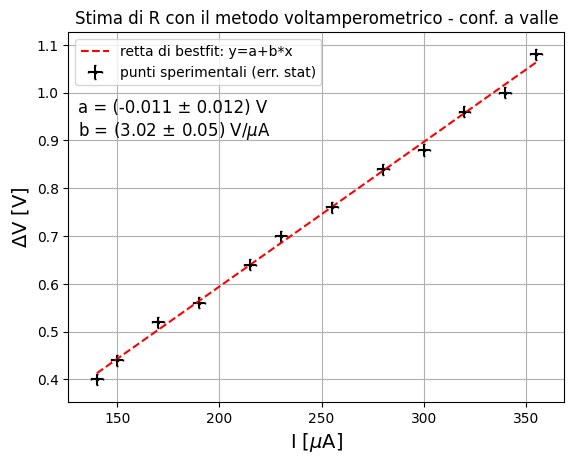

configurazione a valle

valore apparente: R = (3.02 ± 0.05) kohm
valore corretto: R_x_v = (2.44 ± 0.05) kohm


In [14]:
a_v, b_v, sigma_a_v, sigma_b_v, cov_ab_v, chi2_v = fit_lineare_pesato(I_v, V_v, 1.0/sigmaV**2)

plt.errorbar(I_v, V_v, xerr=sigmaI, yerr=sigmaV, fmt='s', markersize=2., capsize=1, color='black', label='punti sperimentali (err. stat)')
plt.plot(I_v, a_v + b_v*I_v, color='red', ls='--', label='retta di bestfit: y=a+b*x')
str_A = 'a = ({:.3f} ± {:.3f}) V'.format(a_v, sigma_a_v)
str_B = 'b = ({:.2f} ± {:.2f}) V/$\mu$A'.format(b_v*1000, sigma_b_v*1000)
plt.annotate(str_A+'\n'+str_B,
        xy=(0.02, 0.82), xycoords='axes fraction',
        ha='left', va='top', fontsize=12)
plt.legend()
plt.ylabel('$\Delta$V [V]', size=14)
plt.xlabel('I [$\mu$A]', size=14)
plt.grid()
plt.title('Stima di R con il metodo voltamperometrico - conf. a valle')
plt.show()


R_v = b_v*1E3
sigma_R_v = sigma_b_v*1E3
R_x_v = R_v - 0.588
sigma_R_x_v = sigma_R_v
print('configurazione a valle\n')
print('valore apparente: R = ({:.2f} ± {:.2f}) kohm'.format(R_v, sigma_R_v))
print('valore corretto: R_x_v = ({:.2f} ± {:.2f}) kohm'.format(R_x_v, sigma_R_x_v))

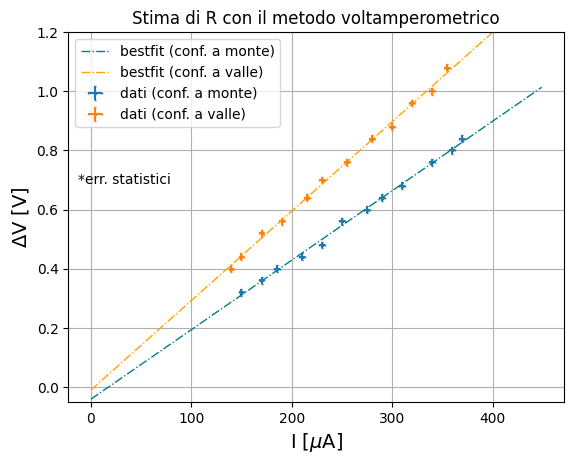

In [15]:
plt.errorbar(I_m, V_m, xerr=sigmaI, yerr=sigmaV, fmt='s', markersize=2., capsize=1, label='dati (conf. a monte)')
plt.errorbar(I_v, V_v, xerr=sigmaI, yerr=sigmaV, fmt='s', markersize=2., capsize=1, label='dati (conf. a valle)')

x = np.arange(0, 450)
plt.plot(x, a_m + b_m*x, color='teal', ls='-.', lw=1, label='bestfit (conf. a monte)')
plt.plot(x, a_v + b_v*x, color='orange', ls='-.', lw=1, label='bestfit (conf. a valle)')


plt.annotate('*err. statistici',
        xy=(0.02, 0.62), xycoords='axes fraction',
        ha='left', va='top', fontsize=10)

plt.legend()
plt.ylabel('$\Delta$V [V]', size=14)
plt.xlabel('I [$\mu$A]', size=14)
plt.grid()
plt.title('Stima di R con il metodo voltamperometrico')
#plt.savefig('metodo_voltamperometrico.png', dpi=300)
#ricordate di chiamare savefig prima di show()
#plt.xlim(0, 400)
plt.ylim(-0.05, 1.2)
plt.show()


In [16]:
print('valori apparenti')
print()
print('configurazione a valle: R = ({:.2f} ± {:.2f}) kohm'.format(R_v, sigma_R_v))
print('configurazione a monte: R = ({:.2f} ± {:.2f}) kohm'.format(R_m, sigma_R_m))

valori apparenti

configurazione a valle: R = (3.02 ± 0.05) kohm
configurazione a monte: R = (2.35 ± 0.05) kohm


In [17]:
print('valori corretti')
print()
print('configurazione a valle: R = ({:.2f} ± {:.2f}) kohm'.format(R_x_v, sigma_R_x_v))
print('configurazione a monte: R = ({:.2f} ± {:.2f}) kohm'.format(R_x_m, sigma_R_x_m))

valori corretti

configurazione a valle: R = (2.44 ± 0.05) kohm
configurazione a monte: R = (2.50 ± 0.05) kohm


Sono consistenti queste misure?

Valutiamo quanto discrepano, ossia calcoliamo lo scarto dei due valori normalizzato all'errore

In [18]:
R_x = np.array([R_x_v, R_x_m]) #array con i valori corretti di R
sigma_R_x = np.array([sigma_R_x_v, sigma_R_x_m]) #array con le incertezze delle due stime

In [19]:
scarto = abs(R_x[1]-R_x[0])
errore_scarto = (np.sqrt(np.sum(sigma_R_x**2)))
print(f'|R_x_m-R_x_v|={scarto:.2f}')
print('err_{|R_x_m-R_x_v|}'+f'={errore_scarto:.2f}')

|R_x_m-R_x_v|=0.06
err_{|R_x_m-R_x_v|}=0.07


Quale è la migliore stima di R?

Possiamo fornire come stima la media pesata dei valori ottenuti con i due metodi

In [20]:
W_Rw = 1/sigma_R_x**2
Rw = np.average(R_x, weights = W_Rw) #effettua la media pesata
sigmaRw = np.sqrt(1/np.sum(W_Rw))
print(f'media pesata: {Rw:.2f} +/- {sigmaRw:.2f}')

media pesata: 2.46 +/- 0.04


In [21]:
R = np.array([R_v, R_m]) #array con i valori apparenti di R
sigma_R = np.array([sigma_R_v, sigma_R_m]) #array con le incertezze delle due stime

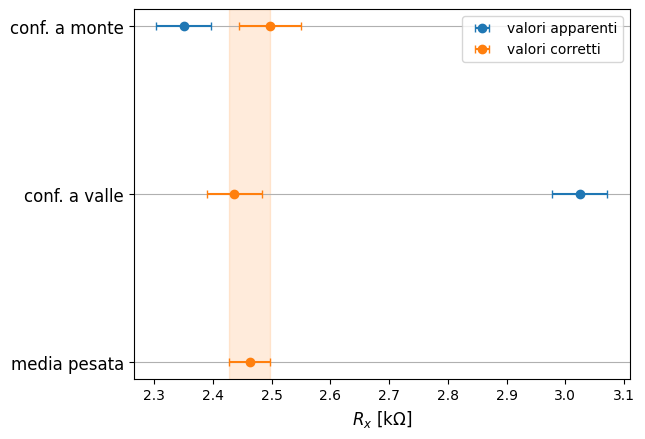

In [22]:
plt.errorbar(R, [1, 2], xerr=sigma_R, fmt='o', capsize=3, label='valori apparenti')
plt.errorbar(R_x, [1, 2], xerr=sigma_R_x, fmt='o', capsize=3, label='valori corretti')
plt.legend()
plt.errorbar(Rw, [0], xerr=sigmaRw, fmt='o', capsize=3, color='C1')
plt.yticks([0, 1, 2], ['media pesata', 'conf. a valle', 'conf. a monte'], size=12)
#plt.xlim(2.2, 2.7)
plt.ylim(-0.1, 2.1)
plt.xlabel(r'$R_x$ [k$\Omega$]', size=12)
plt.axvspan(Rw-sigmaRw, Rw+sigmaRw, alpha=0.15, color='C1')
plt.grid(axis='y')
plt.show()

## minimizzazione con ```scipy```

Per casi in cui relazione funzionale y=y(x) funzione sia piu complicata di una retta potrebbe essere non banale o non possibile trovare una soluzione analitica alla minimizzazione del chi-quadro.

In questi casi si procede con una minimizzazione numerica del chi-quadro. 

La libreria SciPy fornisce la funzione [curve_fit](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html), che implementa la minimizzazione numerica del chiquadro

In [23]:
from scipy.optimize import curve_fit

N.B. Per calcolare l'errore dalle seconde derivate di $\chi^2$, è necessario abilitare l'opzione absolute_sigma, che è di default impostata su False.

In [24]:
# prototipo funzione da fittare

def func(x, a, b):
    return a + b*x

La funzione prototipo f(x, ...), deve prendere la variabile indipendente come primo argomento e i parametri  come argomenti rimanenti.

In [25]:
popt, pcov = curve_fit(func, I_m, V_m, sigma=sigmaV, absolute_sigma=True)

#popt, pcov = curve_fit(func, I_m, V_m, p0=[2, 1], sigma=dV, absolute_sigma=True)

In [26]:
print('optimal values: \n', popt)
print('--------------------------')
print('covariance matrix: \n', pcov)

optimal values: 
 [-0.04160108  0.00235007]
--------------------------
covariance matrix: 
 [[ 1.59755800e-04 -5.68068892e-07]
 [-5.68068892e-07  2.17096397e-09]]


In [27]:
a, b = popt[0], popt[1]
var_a, cov_ab, var_b = pcov[0,0], pcov[0,1], pcov[1,1]
sigma_a = np.sqrt(var_a)
sigma_b = np.sqrt(var_b)

print('a = {:.3f} ± {:.3f}'.format(a, sigma_a))
print('b = {:.5f} ± {:.5f}'.format(b, sigma_b))
print(f"cov(a,b) = {cov_ab:.2}")

a = -0.042 ± 0.013
b = 0.00235 ± 0.00005
cov(a,b) = -5.7e-07


In [28]:
a_m, b_m, sigma_a_m, sigma_b_m, cov_ab_m, chi2_m = fit_lineare_pesato(I_m, V_m, 1.0/sigmaV**2)

a = -0.041601085481682495+/-0.012639452781724304
b = 0.002350067842605156+/-4.659359789706324e-05
cov(a,b) = -5.680687471732247e-07
chi/ndof= 8.051560379918623/10 = 0.8051560379918623
